In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [141]:
sales = pd.read_csv('/Users/banu/Downloads/pandasprojects/datasets/sales_data.csv', parse_dates=['Date'])

In [142]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


What's the mean of Customers_Age?

In [143]:
sales['Customer_Age'].mean()

35.91921157861212

Show a density (KDE) and a box plot with the Customer_Age data:

<Axes: ylabel='Density'>

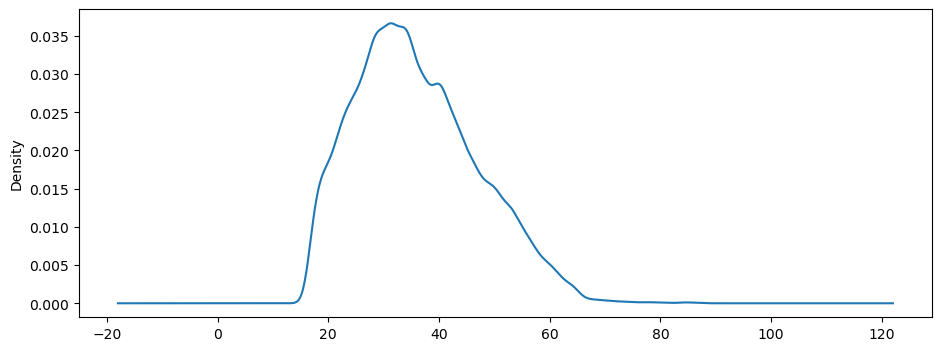

In [144]:
sales['Customer_Age'].plot(kind='kde', figsize=(11,4))

<Axes: >

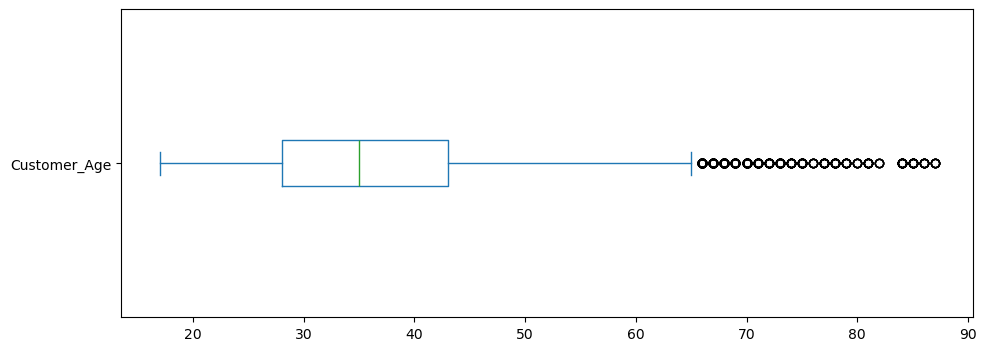

In [145]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(11,4))

What's the mean of Order_Quantity?

In [146]:
sales['Order_Quantity'].mean()

11.901659648253654

Show a histogram and a box plot with the Order_Quantity data:

<Axes: ylabel='Frequency'>

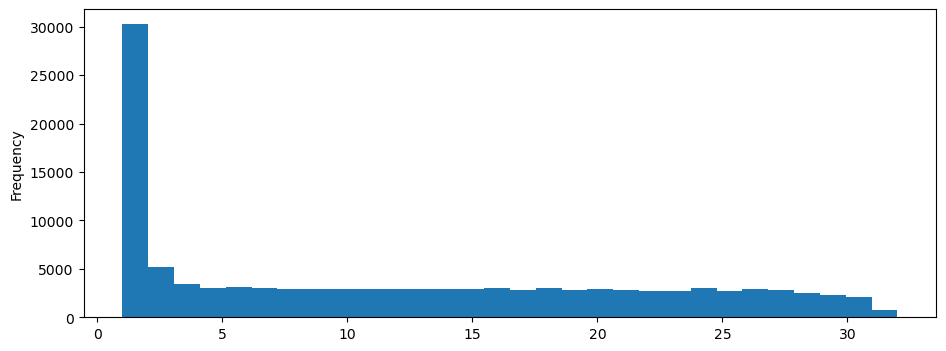

In [147]:
sales['Order_Quantity'].plot(kind='hist',bins=30 ,figsize=(11,4))

<Axes: >

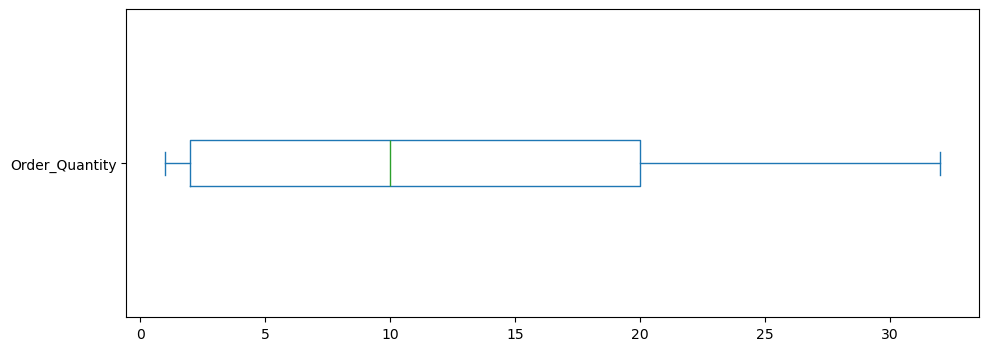

In [148]:
sales['Order_Quantity'].plot(kind='box',vert=False,figsize=(11,4))

How many sales per year do we have?

In [149]:
sales['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

Show a pie plot with the previous data:

<Axes: ylabel='count'>

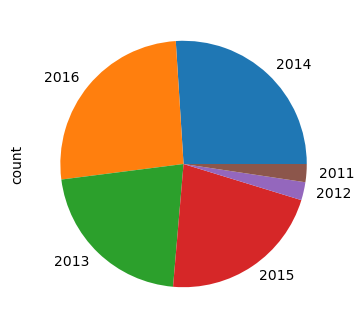

In [150]:
sales['Year'].value_counts().plot(kind='pie', figsize=(4,4))

How many sales per month do we have?

In [151]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

Show a bar plot with the previous data:

<Axes: xlabel='Month'>

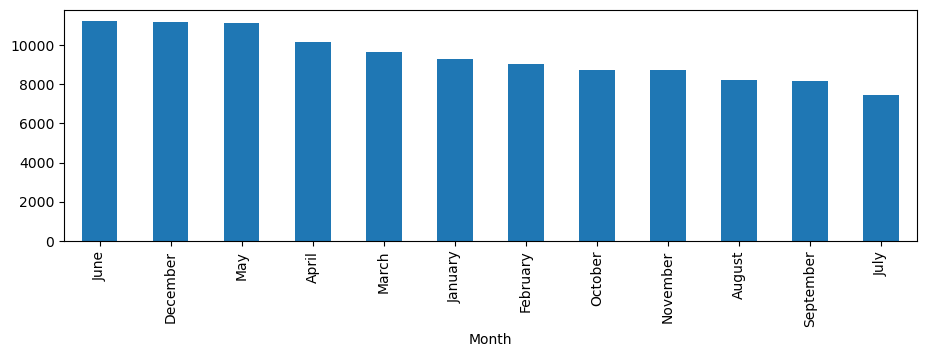

In [152]:
sales['Month'].value_counts().plot(kind='bar', figsize=(11,3))

Which country has the most sales quantity of sales?

In [153]:
sales['Country'].value_counts().head(1)

Country
United States    39206
Name: count, dtype: int64

Create a list of every product sold

In [154]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

Create a bar plot showing the 10 most sold products (best sellers):

<Axes: xlabel='Product'>

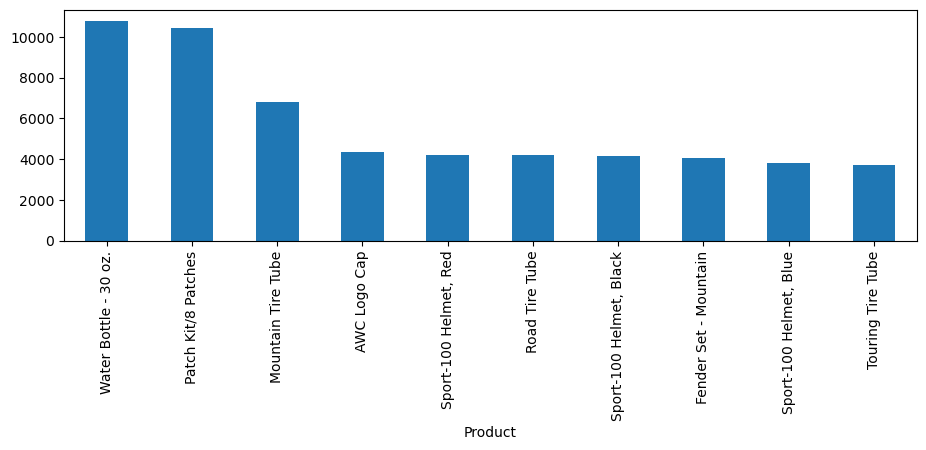

In [155]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(11,3))

Can you see any relationship between Unit_Cost and Unit_Price?

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

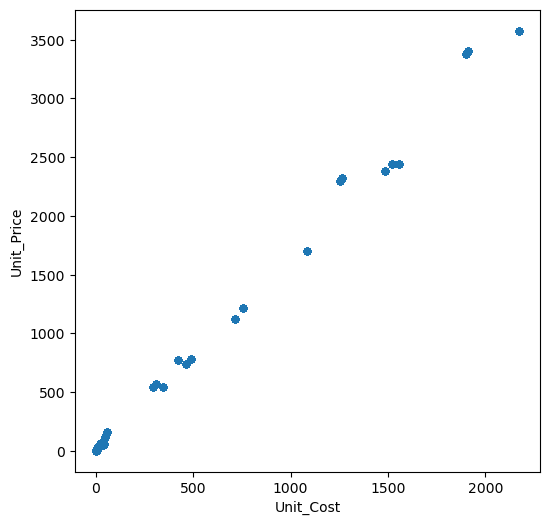

In [156]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

Can you see any relationship between Profit per Country?

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

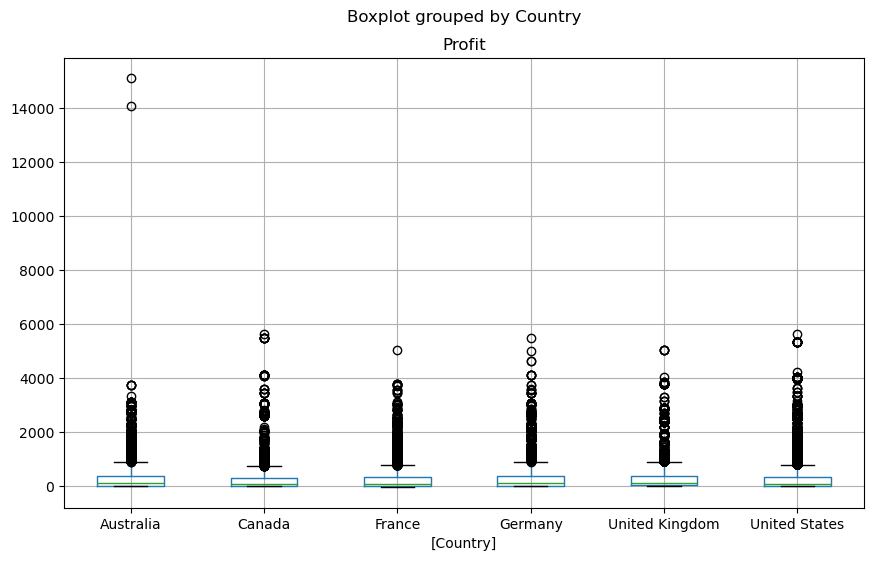

In [157]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

Add and calculate a new Calculated_Date column -Use Day, Month, Year to create a Date column (YYYY-MM-DD).

In [158]:
sales['Calculated_Date'] = sales.loc[:,['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

/var/folders/r_/rbshf46s5810n6s9qkqgxqdc0000gn/T/ipykernel_50951/1369162054.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Calculated_Date'] = sales.loc[:,['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

Parse your Calculated_Date column into a datetime object

In [159]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

How did sales evolve through the years? Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.

<Axes: xlabel='Calculated_Date'>

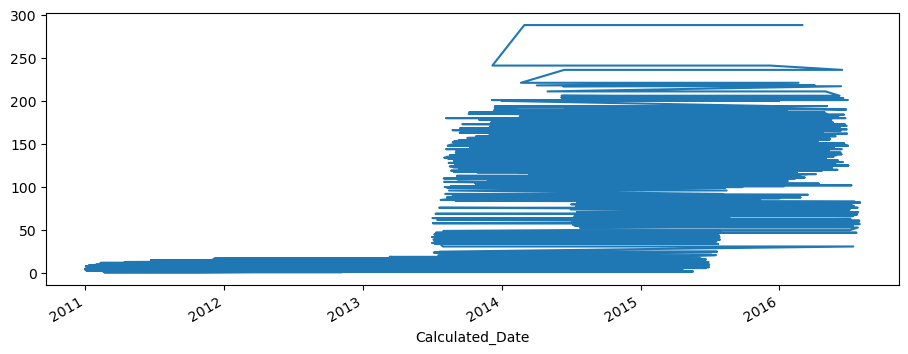

In [160]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(11,4))

Increase 50 U$S revenue to every sale

In [177]:
sales['Revenue'] += 50 

How many orders were made in Canada or France?

In [162]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

How many Bike Racks orders were made from Canada?

In [163]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

How many orders were made in each region (state) of France?

In [164]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

How many sales were made per category?

In [165]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

How many orders were made per accessory sub-categories?

In [166]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

Which gender has the most amount of sales?

In [167]:
sales['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

How many sales with more than 500 in Revenue were made by men?

In [168]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] >= 500)].shape[0]

23392

Get the top-5 sales with the highest revenue

In [169]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


What is the mean Order_Quantity of orders with more than 10K in revenue?

In [170]:
cond = sales['Revenue'] > 10_000
sales.loc[cond, 'Order_Quantity'].mean()

3.689265536723164

How many orders were made in May of 2016?

In [171]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]

5015

How many orders were made between May and July of 2016?

In [172]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))
sales.loc[cond].shape[0]

12164

Show a grouped box plot per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

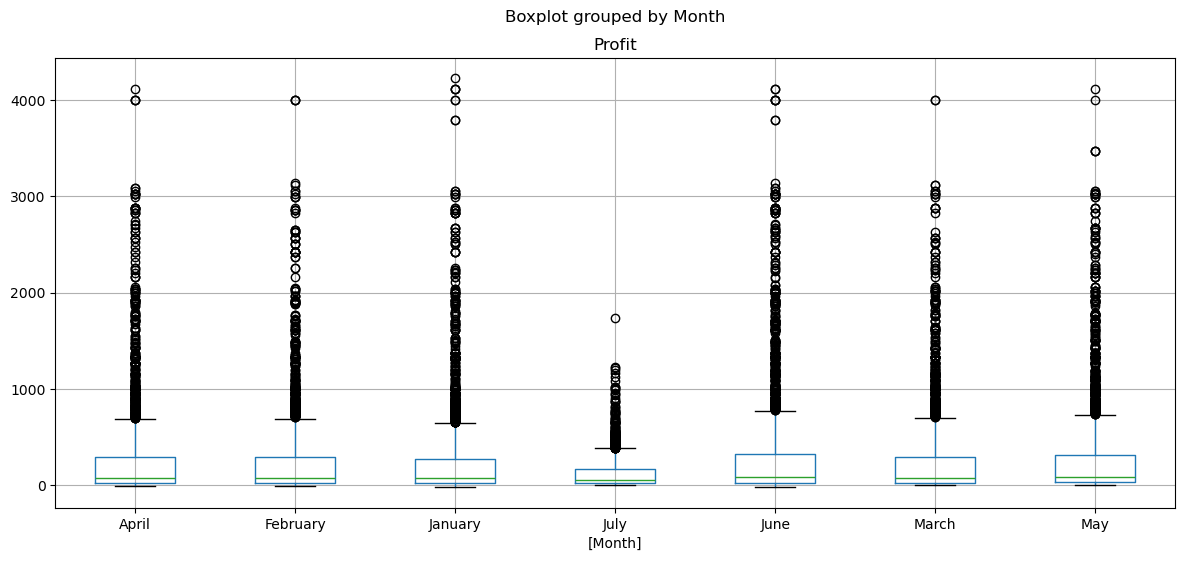

In [173]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14,6))

Add 7.2% TAX on every sale Unit_Price within United States

In [178]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] += 1.072